## Chi-Square Test for Categorical Feature Selection

### Introduction



Features in a machine learning model are columns that describes the characteristics of targets to be measured e.g age, sex, weight, level of education, years of work experience, home address are all features used in describing an individual.

Feature Selection is a process which involves reducing the input variables needed in a model by using only relevant data and getting rid of those variables that add little or no information. From the example above, weight and home address should probably not be used in a model that tries to determine an individual's salary. This process simplifies the model, reduces training time, avoid overfitting, and also helps data scientsits avoid the curse of dimensionality

There are generally 2 types of features in a machine learning model.

1. Numerical Features which are quantitative variables that carries a sense of magnitude related to the context of the variable which are measurable in numbers e.g Age, Height, Salary

2. Categorical Features which are qualitative variabless which maybe assigned based on particular qualities e.g Sex, Location, Department, Marital Status

These different feature types have different selection techniques. Pearson's Correlation rank and **Chi-Square Test** for Categorical features. The rest of this exercise is going to be spent applying the Chi-Square feature selection technique on categorical variables of a dataset

### Importing Libraries and Loading Dataset

In [35]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

In [2]:
#loading dataset
HR_data = pd.read_csv("C:\\Users\\ofagb\\OneDrive\\Documents\\R\\Employee Attrition.csv")
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Splitting dataset into Numeric and Categorical Variables

In [5]:
#numeric variables
num_data = HR_data.select_dtypes(include=[np.number])
num_data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [19]:
#categorical variables
cat_data = HR_data.select_dtypes(exclude=[np.number])
cat_data.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [20]:
#no of unique value in each categorical feature
cat_data.nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [21]:
#dropping column with little information i.e only 1 unique value
cat_data = cat_data.drop('Over18',axis=1)
cat_data.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


### Encoding Categorical Features

In [24]:
#carrying out binary encoding for features with 2 unique values
cat_data['Attrition'] = cat_data['Attrition'].replace({'Yes':1, 'No':0})
cat_data['Gender'] = cat_data['Gender'].replace({'Male':1, 'Female':0})
cat_data['OverTime'] = cat_data['OverTime'].replace({'Yes':1, 'No':0})

In [25]:
#View df with encoded 
cat_data.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,0,Sales Executive,Single,1
1,0,Travel_Frequently,Research & Development,Life Sciences,1,Research Scientist,Married,0
2,1,Travel_Rarely,Research & Development,Other,1,Laboratory Technician,Single,1
3,0,Travel_Frequently,Research & Development,Life Sciences,0,Research Scientist,Married,1
4,0,Travel_Rarely,Research & Development,Medical,1,Laboratory Technician,Married,0


In [28]:
# one-hot encoding other categorical variables using get_dummies method
cat_data_encoded = pd.get_dummies(cat_data)
cat_data_encoded.head()

,Attrition,Gender,OverTime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


### Spliting Data 

In [ ]:
#splitting the features and target 
X = cat_data_encoded.drop(columns = 'Attrition', axis = 1)
y = cat_data_encoded[['Attrition']]

In [32]:
#splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
#training data 80% (1176) and test data 20% (294)
print(X.shape, X_train.shape, X_test.shape) 

(1470, 26) (1176, 26) (294, 26)


### Performing Chi-Square Test

Chi-square test returns 2 values the F-score and the p-value. The p-value is usually used in determining feature importance for categorical variables (especially Nominal).

If the p-value obtained is < 0.05 you reject the H₀ (Null Hypothesis) and accept the H₁ (Alternate Hypothesis). This means the two categorical variables are dependent. While if p-value obtained is > 0.05 you accept the H₀ (Null Hypothesis) and reject the H₁ (Alternate Hypothesis). This means the two categorical variables are independent.

In the case of feature selection for machine learning, you would want the feature that is being compared to the target to have a low p-value (less than 0.05), as this means that the feature is dependent on (correlated to) the target.

In [37]:
#first array are f-scores while second array are the p-values
f_p_values = chi2(X_train, y_train)
f_p_values

(array([6.40744443e-01, 6.58869059e+01, 6.35250655e+00, 1.20484274e+01,
        7.86077816e-01, 3.57315486e-01, 3.29998530e+00, 5.86595610e+00,
        1.71120012e+00, 8.55332403e-01, 2.15893349e+00, 1.27850856e+00,
        3.94475564e-02, 4.51975688e+00, 1.09335688e+01, 1.45838756e+00,
        9.70886782e+00, 7.82068334e+00, 8.09878673e+00, 9.37716392e+00,
        1.50081661e-01, 1.40414824e-01, 3.21427799e+01, 9.60958938e+00,
        6.63350741e+00, 3.43547019e+01]),
 array([4.23441352e-01, 4.77553834e-16, 1.17215568e-02, 5.18360898e-04,
        3.75288749e-01, 5.50000939e-01, 6.92805033e-02, 1.54364721e-02,
        1.90829735e-01, 3.55048191e-01, 1.41743042e-01, 2.58176527e-01,
        8.42564632e-01, 3.35055922e-02, 9.44374074e-04, 2.27186852e-01,
        1.83380955e-03, 5.16516628e-03, 4.42948987e-03, 2.19705199e-03,
        6.98457332e-01, 7.07868969e-01, 1.43248048e-08, 1.93563919e-03,
        1.00078015e-02, 4.59289435e-09]))

In [ ]:
#converting arrays in series for F_score and p-values
# Series for F_score
F_score = pd.Series(f_p_values[0])
F_score.index = X_train.columns
F_score

# Series for p-value
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values

In [73]:
#converting 2 series to dataframe then merging them
df1 = pd.DataFrame(F_score)
df1 = df1.rename(columns = {0:'F_score'})

df2 = pd.DataFrame(p_values)
df2 = df2.rename(columns = {0:'p_values'})

chi_test_score = pd.concat([df1, df2 ], axis=1)
chi_test_score.head()

,F_score,p_values
Gender,0.640744,4.234414e-01
OverTime,65.886906,4.775538e-16
BusinessTravel_Non-Travel,6.352507,1.172156e-02
BusinessTravel_Travel_Frequently,12.048427,5.183609e-04
BusinessTravel_Travel_Rarely,0.786078,3.752887e-01


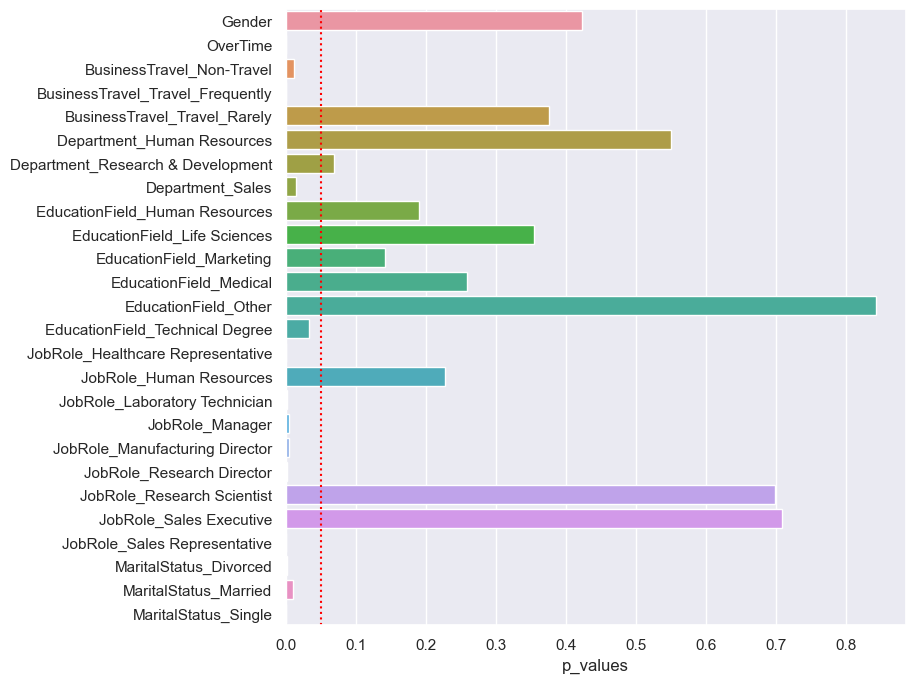

In [95]:
#Vizualizing p-scores of categorical features

#define figure size
sns.set(rc={"figure.figsize":(8, 8)}) #width= 8, height= 8

graph = sns.barplot(x = "p_values", y= X_train.columns, data = chi_test_score)

#Drawing a horizontal line at the p-value threshold 0.05 - vline (vertical line) while hline(horizontal line)
graph.axvline(0.05, color = 'red', ls = 'dotted')

In [106]:
#drop columns with p > 0.05 from categorical df
cat_data2 = cat_data_encoded.drop(columns = ['Gender', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources','EducationField_Human Resources',\
                                     'EducationField_Life Sciences','EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other',\
                                    'JobRole_Human Resources', 'JobRole_Research Scientist', 'JobRole_Sales Executive'],axis = 1)
cat_data2.head()

,Attrition,OverTime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


### Merge numeric and categorical data

In [108]:
#new catergorical df with features with p-value of < 0.05 is merged with nuerical df 
HR_data2 = pd.concat([cat_data2, num_data], axis=1)
HR_data2

,Attrition,OverTime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,0,0,0,1,0,0,0,0,...,1,80,0,8,0,1,6,4,0,5
1,0,0,0,1,1,0,0,0,0,0,...,4,80,1,10,3,3,10,7,1,7
2,1,1,0,0,1,0,0,0,1,0,...,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,1,0,0,0,0,0,...,3,80,0,8,3,3,8,7,3,0
4,0,0,0,0,1,0,0,0,1,0,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,0,0,1,1,0,0,0,1,0,...,3,80,1,17,3,3,5,2,0,3
1466,0,0,0,0,1,0,0,1,0,0,...,1,80,1,9,5,3,7,7,1,7
1467,0,1,0,0,1,0,0,0,0,0,...,2,80,1,6,0,3,6,2,0,3
1468,0,0,0,1,0,1,0,0,0,0,...,4,80,0,17,3,2,9,6,0,8


The classification process continues from here on... 